In [2]:
import os
import shutil
import random
import keras
import tensorflow

In [45]:
import tensorflow as tf

# Load MobileNetV3 model
model = keras.models.load_model("Trained_Mobile_Custom_Seven_Model")

In [46]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
test_path = 'data/Farm_Fresh_Dataset_2/test_all'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 200 images belonging to 4 classes.


In [47]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose=0)

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [49]:
test_batches.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

Confusion matrix, without normalization
[[50  0  0  0]
 [ 4 46  0  0]
 [ 0  0 50  0]
 [ 1  2  3 44]]


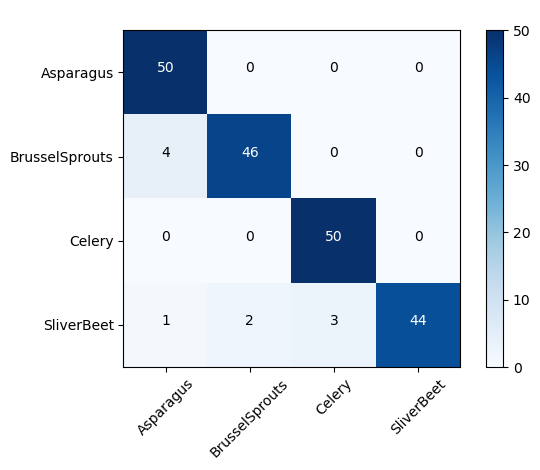

In [50]:
from matplotlib import pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Mobile Large Confusion',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.savefig("confusion_mobile.png")
    

cm_plot_labels = ['Asparagus', 'BrusselSprouts', 'Celery', 'SliverBeet']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title=' ')